In [1]:
library('dplyr')


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
library('smbinning')

Loading required package: sqldf

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite

Loading required package: partykit

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: Formula



In [3]:
library('tidyr')

In [4]:
library('ggplot2')

In [5]:
library('tidyverse')

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.4     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [6]:
library('repr')

In [7]:
library('DescTools')

In [8]:
library('bestNormalize')

In [28]:
library('corrplot')

corrplot 0.84 loaded



In [91]:
library('MASS')


Attaching package: 'MASS'


The following object is masked from 'package:bestNormalize':

    boxcox


The following object is masked from 'package:dplyr':

    select




In [103]:
library('optiRum')


Attaching package: 'optiRum'


The following object is masked from 'package:DescTools':

    PMT




In [116]:
library('pROC')

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [151]:
library('psych')


Attaching package: 'psych'


The following objects are masked from 'package:DescTools':

    AUC, ICC, SD


The following objects are masked from 'package:ggplot2':

    %+%, alpha




In [150]:
install.packages('psych')

Installing package into 'C:/Users/pawel/OneDrive/Dokumenty/R/win-library/4.0'
(as 'lib' is unspecified)



package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pawel\AppData\Local\Temp\RtmpAFnby7\downloaded_packages


In [147]:
data <- read.csv('C:/Users/pawel/PycharmProjects/Model/Dataset.csv', fileEncoding="UTF-8-BOM")

In [148]:
data$X <- NULL

In [153]:
summary(data)

       pd                 y                 atch              empch         
 Min.   :0.000000   Min.   :0.000000   Min.   :-0.99954   Min.   :-1.00000  
 1st Qu.:0.000000   1st Qu.:0.000000   1st Qu.:-0.04054   1st Qu.:-0.04444  
 Median :0.000000   Median :0.000000   Median : 0.05274   Median : 0.02155  
 Mean   :0.060413   Mean   :0.008276   Mean   :     Inf   Mean   :     Inf  
 3rd Qu.:0.002571   3rd Qu.:0.000000   3rd Qu.: 0.18456   3rd Qu.: 0.12658  
 Max.   :1.000000   Max.   :1.000000   Max.   :     Inf   Max.   :     Inf  
     salech             roech               ptbch                nich         
 Min.   :-6.48789   Min.   :     -Inf   Min.   :     -Inf   Min.   :-1.00000  
 1st Qu.:-0.03419   1st Qu.:-0.094281   1st Qu.:-0.569063   1st Qu.:-0.23790  
 Median : 0.07045   Median :-0.004721   Median :-0.002518   Median : 0.04159  
 Mean   :     Inf   Mean   :      NaN   Mean   :      NaN   Mean   : 0.01390  
 3rd Qu.: 0.21583   3rd Qu.: 0.057653   3rd Qu.: 0.502332   3rd Qu

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



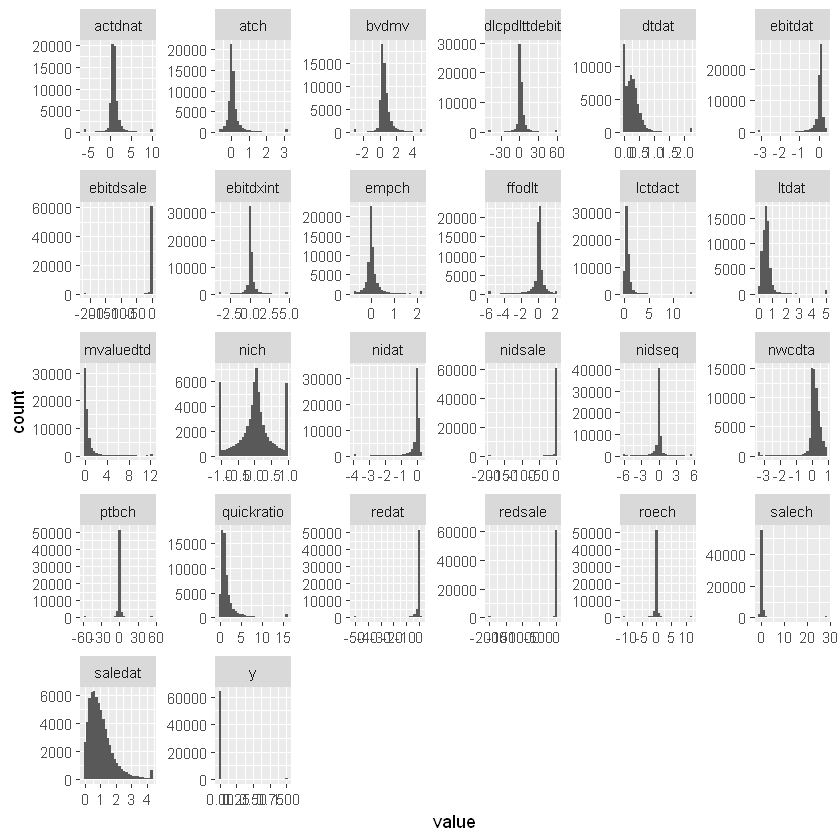

In [159]:
data %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

In [161]:
# data winsorization - changing extreme values(inf) to the 0.01 percentile and 0.99 percentile
for (i in colnames(data[,-1])){
    data[,-1][,i] <- Winsorize(data[,-1][,i], probs = c(0.01, 0.99))
}

In [315]:
# stratified dataset split - train and test samples
train.index <- caret::createDataPartition(data$y, p = .7, list = FALSE)

In [316]:
train <- data[train.index,]
test <- data[-train.index,]

In [319]:
# data normalization - train dataset
for (i in colnames(train[,-1])){
    train[,i] <- yeojohnson(train[,i])$x.t
}

In [320]:
# data normalization - test dataset
for (i in colnames(test[,-1])){
    test[,i] <- yeojohnson(test[,i])$x.t
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



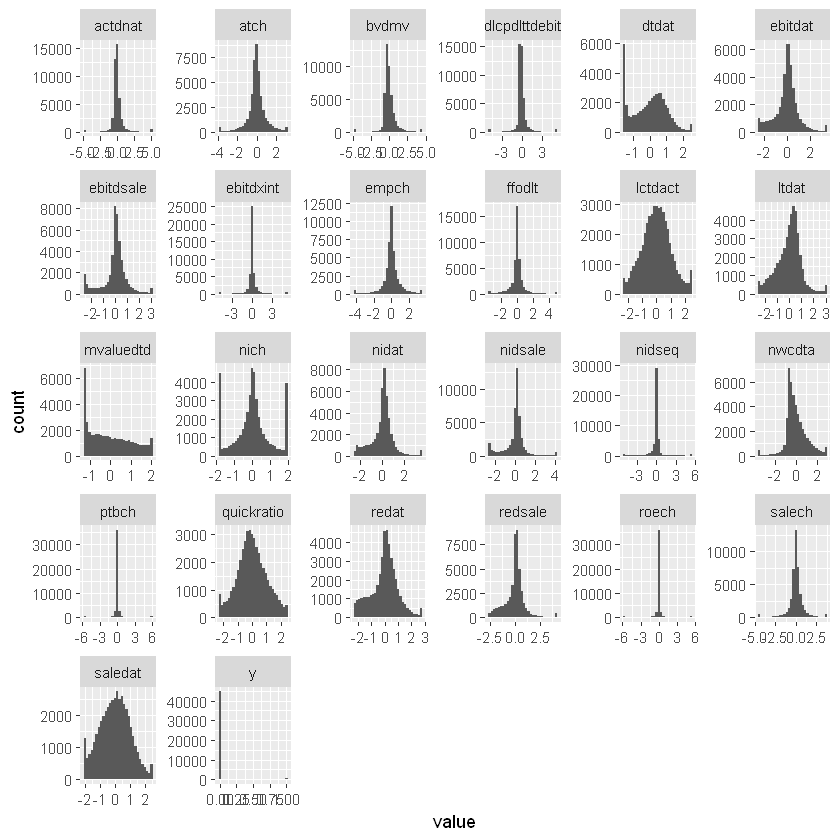

In [321]:
train %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

In [211]:
# categorizing numeric characteristic into bins for ulterior usage in scoring modeling - train set
# for (i in colnames(train[,-2])){
#     result <- smbinning(train, y = 'y', x = i, p = 0.2)
#     if(is.character(result) == TRUE){
#     next
#     }
#     train <- smbinning.gen(train, result, paste(i, 'bin', sep = "_"))
#     }

In [212]:
# categorizing numeric characteristic into bins for ulterior usage in scoring modeling - test set
# for (i in colnames(test[,-2])){
#     result <- smbinning(test, y = 'y', x = i, p = 0.2)
#     if(is.character(result) == TRUE){
#     next
#     }
#     test <- smbinning.gen(test, result, paste(i, 'bin', sep = "_"))
#     }

In [242]:
# removing features which were not assigned to bins
# test <- test[,-c(31)]

In [243]:
# train <- train[,-c(31,41)]

In [322]:
# variables' importance analysis
iv.analysis <- smbinning.sumiv(df=train,y="y")

 
  |--------------------------------------------------| 100%
 


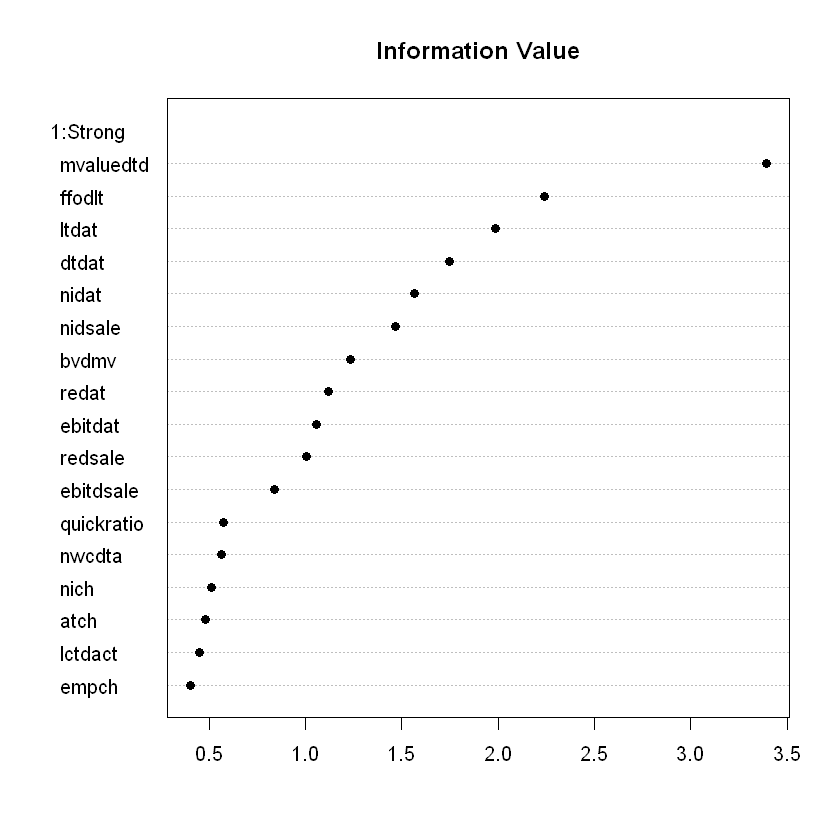

In [323]:
# Information value for those features where the calculation of bins were possible
par(mfrow=c(1,1))
smbinning.sumiv.plot(iv.analysis,cex=1)

In [324]:
# Computing Spearman rank correlation based on variables

In [325]:
matrix_corr<- cor(train[,-c(1)], method = 'spearman')

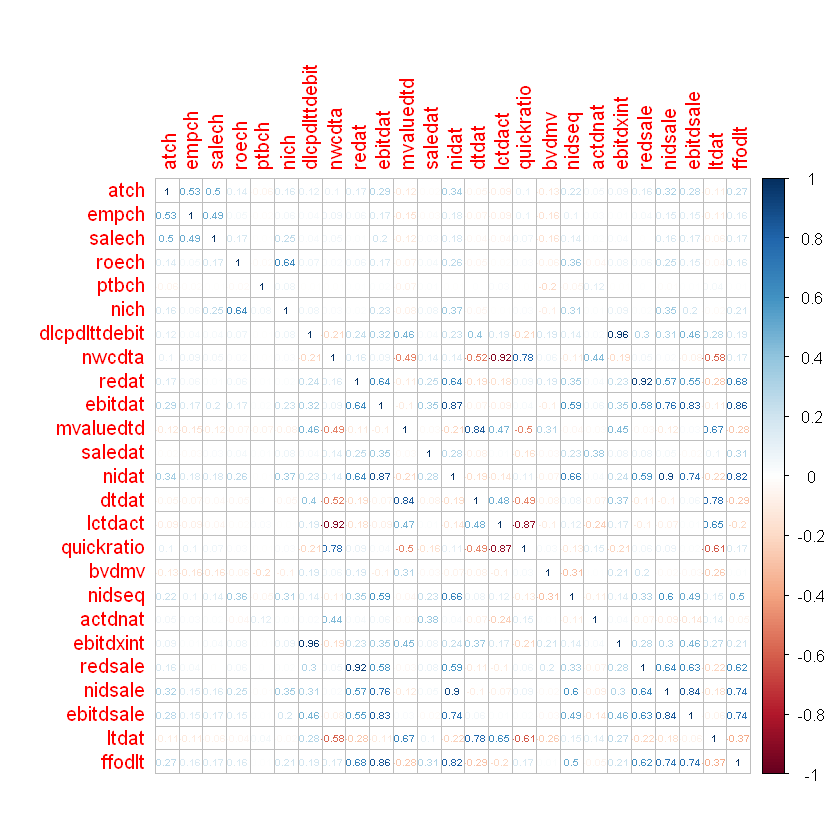

In [326]:
# Graphical inspection
corrplot(matrix_corr, method = 'number', number.cex = 0.5)

In [327]:
corr <- as.data.frame(as.table(matrix_corr))

In [328]:
min_corr <- head(arrange(corr, Freq),10)

In [329]:
max_corr <- arrange(corr, desc(Freq))

In [330]:
max_corr <- max_corr[27:nrow(max_corr),]

In [331]:
min_corr

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
1,lctdact,nwcdta,-0.9178370
2,nwcdta,lctdact,-0.9178370
3,quickratio,lctdact,-0.8746042
4,lctdact,quickratio,-0.8746042
5,ltdat,quickratio,-0.6139006
6,quickratio,ltdat,-0.6139006
7,ltdat,nwcdta,-0.5805548
8,nwcdta,ltdat,-0.5805548
9,dtdat,nwcdta,-0.5173741


In [332]:
head(max_corr,10)

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
27,dlcpdlttdebit,ebitdxint,0.9570868
28,redsale,redat,0.9244746
29,redat,redsale,0.9244746
30,nidsale,nidat,0.9024855
31,nidat,nidsale,0.9024855
32,nidat,ebitdat,0.8693718
33,ebitdat,nidat,0.8693718
34,ffodlt,ebitdat,0.8595052
35,ebitdat,ffodlt,0.8595052


In [333]:
# Stepwise model fitting is used as many features in dataset are correlated
logit_full<- glm(y~., family = binomial(link = 'logit'), data = train)

In [334]:
logit_stepwise<- stepAIC(logit_full, trace = FALSE, direction = 'both')

In [335]:
summary(logit_stepwise)


Call:
glm(formula = y ~ atch + salech + roech + nich + dlcpdlttdebit + 
    nwcdta + redat + mvaluedtd + nidat + dtdat + quickratio + 
    nidseq + actdnat + ebitdxint + ebitdsale + ltdat, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1231  -0.0850  -0.0293  -0.0131   4.9868  

Coefficients:
              Estimate Std. Error z value             Pr(>|z|)    
(Intercept)   -7.38623    0.18840 -39.205 < 0.0000000000000002 ***
atch           0.10121    0.05832   1.735             0.082667 .  
salech         0.19215    0.05821   3.301             0.000964 ***
roech          0.11941    0.04672   2.556             0.010600 *  
nich          -0.18414    0.05462  -3.371             0.000749 ***
dlcpdlttdebit -0.31282    0.08999  -3.476             0.000509 ***
nwcdta         0.37017    0.09680   3.824             0.000131 ***
redat          0.68482    0.12118   5.651         0.0000000159 ***
mvaluedtd      2.35235  

In [336]:
# Defining a scaling function to normalize scores withing given interval
# pdo means points to double the odds
scaled_score <- function(logit, odds, offset, pdo){
                                        b = pdo/log(2) # for given pdo the odds double
                                        a = offset - b*log(odds) 
                                        round(a + b*log((1-logit)/logit))} 

In [337]:
# conducting prediction based on estimated model
test$predict_logit <- predict(logit_stepwise, newdata = test, type = 'response')

In [338]:
# scaling scores
# anchor is arbitrarly set at 660 points
# A 72:1 odds ratio is identified in line with common practice.
test$score<-scaled_score(test$predict_logit, 72, 660, 40)

In [339]:
train$predict_logit <- predict(logit_stepwise, newdata = train, type = 'response')

In [340]:
train$score<-scaled_score(train$predict_logit, 72, 660, 40)

In [344]:
data_all <- rbind(train, test)

In [ ]:
# PD calibration procedure is conducted
# Nonetheless the results can be misleading because both test and train data were already used to predict the PD and calculate the score

In [349]:
pd_model<- glm(y~ score, family = binomial(link = 'logit'), data = data_all)

In [350]:
summary(pd_model)


Call:
glm(formula = y ~ score, family = binomial(link = "logit"), data = data_all)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1373  -0.0814  -0.0271  -0.0120   5.0409  

Coefficients:
              Estimate Std. Error z value            Pr(>|z|)    
(Intercept)  7.3822343  0.3470051   21.27 <0.0000000000000002 ***
score       -0.0177611  0.0005849  -30.37 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6160.9  on 64284  degrees of freedom
Residual deviance: 4275.0  on 64283  degrees of freedom
AIC: 4279

Number of Fisher Scoring iterations: 10


In [351]:
data_all$pd<- predict(pd_model, newdata = data_all, type = 'response')

In [352]:
head(test)

,y,atch,empch,salech,roech,ptbch,nich,dlcpdlttdebit,nwcdta,redat,...,nidseq,actdnat,ebitdxint,redsale,nidsale,ebitdsale,ltdat,ffodlt,predict_logit,score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0,0.3762586,-0.05775943,0.3021089,0.013701008,-0.063598217,0.21490668,-0.06551555,0.5138403,0.2194848,...,0.08356470,0.1870813,-0.01064278,0.1207500,0.23689620,0.23730328,-0.23524092,0.196250523,0.0003436602,873
8,0,-0.5097143,-0.25731659,-0.4246331,-0.007462301,-0.007721331,-1.75610645,0.30287531,1.1830824,0.3896500,...,-0.02022980,0.2773269,0.43954337,0.2401230,0.03218837,-0.00358228,-0.03523040,-0.122322573,0.0058772359,709
10,0,-0.1410328,0.04199782,0.1023601,0.018225151,-0.010941841,0.03448272,0.24444219,1.4378247,0.3428139,...,0.02708787,0.4231916,0.37965227,0.2136397,0.11956452,0.04503034,0.15404527,-0.097111438,0.0058259154,710
12,0,0.4407641,-0.19967706,0.2311112,0.020325285,0.037395382,0.28413052,0.03625006,1.4843928,0.3228435,...,0.05693990,0.3640032,0.14586156,0.1916565,0.18438648,0.12722241,-0.00051262,-0.003514232,0.0006940451,833
18,0,-0.3366287,-0.31156806,-0.2962218,0.089000016,-0.035701533,1.21001770,5.35921099,0.1693567,0.2135106,...,-0.06003328,0.2413837,5.12054701,0.1876295,-0.04606071,-0.15071266,0.25983949,-0.199720220,0.0209910235,635
21,0,0.7507862,0.77125883,0.2971781,0.033448296,0.073325304,0.69049631,0.25890701,0.8135680,0.2276101,...,0.05479353,0.3256754,0.18907979,0.1874911,0.18487855,0.11395995,0.25290019,-0.057266881,0.0014815839,789


In [354]:
# gini index
gini_test<- optiRum::giniCoef(data_all$pd, data_all$y)

In [355]:
gini_test

[1] 0.8552699

Setting levels: control = 0, case = 1



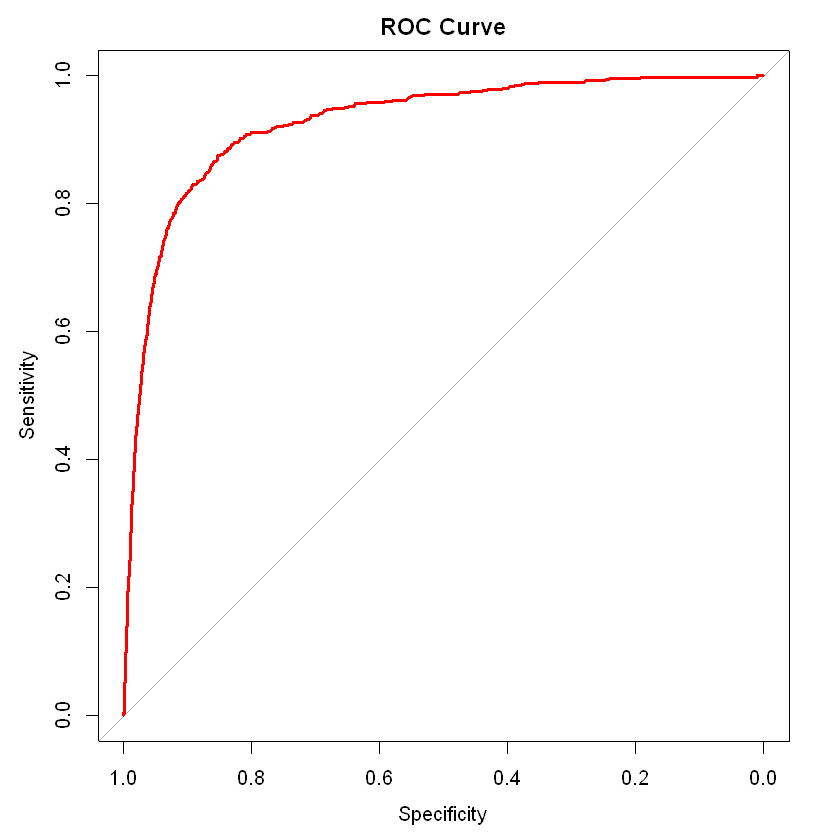

In [356]:
plot(roc(data_all$y,data_all$pd, direction="<"), col="red", lwd=3, main="ROC Curve")

In [357]:
score_cust<- smbinning.custom(data_all, y = 'y', x= 'score', cuts= c(420,460,500,540,580,620,660,700,740,780,820,860,900))

In [223]:
head(test)

,y,atch,empch,salech,roech,ptbch,nich,dlcpdlttdebit,nwcdta,redat,...,actdnat,ebitdxint,redsale,nidsale,ebitdsale,ltdat,ffodlt,predict_logit,score,pd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,0,-0.27770439,-0.84997988,-0.03165619,-0.006829913,-0.210745241,-0.53585013,0.007696877,1.0433922,0.4144154,...,0.25836193,0.1892293,0.2142780,0.1612475,0.13194565,-0.02686845,0.01259177,0.0028812278,751,0.003567771
7,0,-0.05433802,-0.53168112,-0.41618428,0.009463765,0.024087250,-0.39819007,0.094026562,1.0480261,0.4074630,...,0.31204467,0.2081486,0.2490844,0.1290554,0.09024847,0.01673227,-0.04316324,0.0023339243,763,0.002938891
10,0,-0.12642183,0.04333111,0.10291211,0.023266641,-0.005319968,0.04723104,0.229850766,1.4418696,0.3636428,...,0.41115257,0.3620030,0.2297411,0.1269575,0.05306408,0.13418242,-0.08305601,0.0041532586,729,0.005088941
21,0,0.75723543,0.77343268,0.29536492,0.038355284,0.078247225,0.69487090,0.243864075,0.8180641,0.2480646,...,0.31547986,0.1756344,0.2032494,0.1917748,0.12124589,0.23359797,-0.04281138,0.0010500796,809,0.001396322
25,0,0.10592274,0.22851408,-0.28968595,-0.007323117,0.021796662,-0.54979300,0.194494239,0.4617986,0.4071776,...,0.11682582,0.1684023,0.3056367,0.1664456,0.12451782,0.01814338,-0.02905954,0.0023006953,764,0.002891767
30,0,-1.64132513,-0.85616913,-0.81603206,-0.007754083,0.014617977,-1.40133710,-1.882322833,0.4598018,0.7605246,...,0.09952014,-4.0133769,0.4272012,0.0616526,-0.18262244,-0.20461995,-0.10946247,0.0002783997,886,0.000401134


In [358]:
# grouping by bands
data_all <- smbinning.gen(data_all, score_cust, chrname = 'score_band')

In [360]:
# Compare actual against fitted PDs
# Compute mean values
data_pd<- data_all %>%
        dplyr::select(score, score_band, pd, y) %>%
        dplyr::group_by(score_band) %>%
        dplyr::summarise(mean_dr = round(mean(y),4),
        mean_pd = round(mean(pd),4))

`summarise()` ungrouping output (override with `.groups` argument)



In [361]:
# Compute rmse
rmse<-sqrt(mean((data_pd$mean_dr - data_pd$mean_pd)^2))

In [362]:
rmse

[1] 0.1003576

In [363]:
data_pd

score_band,mean_dr,mean_pd
<fct>,<dbl>,<dbl>
01 <= 420,1.0000,0.6290
02 <= 460,0.3333,0.3715
03 <= 500,0.1963,0.2206
04 <= 540,0.1600,0.1270
05 <= 580,0.0793,0.0699
06 <= 620,0.0295,0.0364
07 <= 660,0.0094,0.0183
08 <= 700,0.0080,0.0091
09 <= 740,0.0021,0.0045


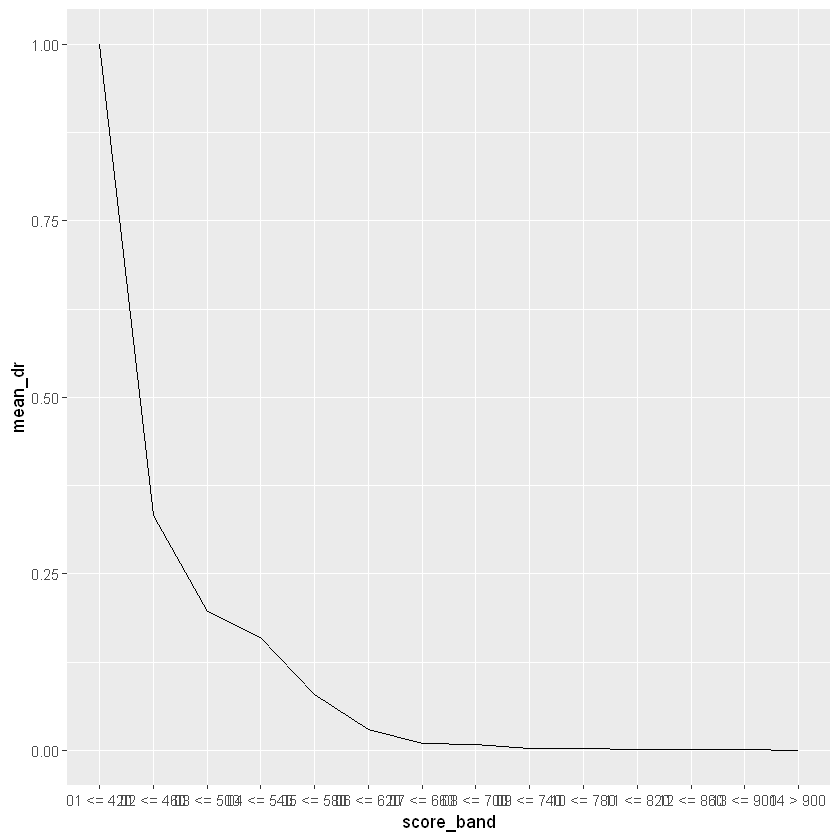

In [364]:
# actual results 
ggplot(data_pd, aes(x = score_band, y = mean_dr)) + 
geom_line(aes(group = 1))

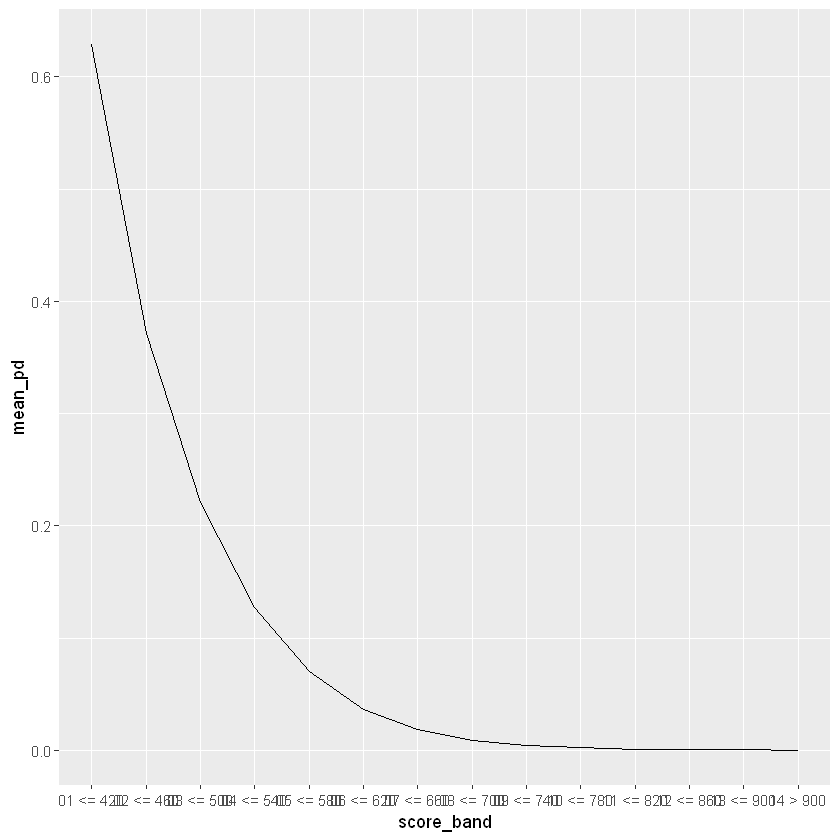

In [365]:
# predicted results 
ggplot(data_pd, aes(x = score_band, y = mean_pd)) + 
geom_line(aes(group = 1))